In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
67,10-05-2020,4719,67636
68,11-05-2020,3181,70817
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004


In [18]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
67,67,67636
68,68,70817
69,69,74519
70,70,78004


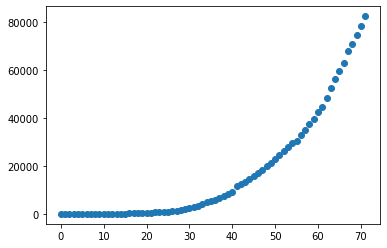

In [19]:

plt.scatter(data['days'], data['confirmed'])


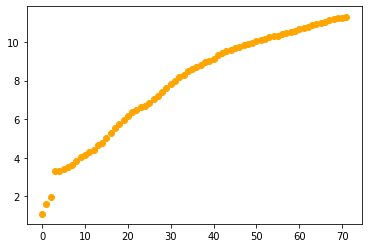

In [20]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [21]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

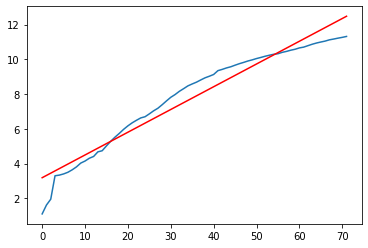

In [22]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

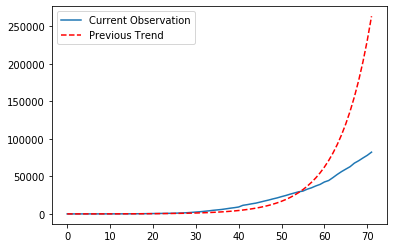

In [23]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [24]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9449780639761445

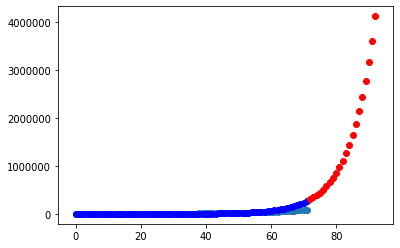

In [25]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [26]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
        89, 90, 91, 92]),
 array([[ 300076.65356208],
        [ 342059.47445371],
        [ 389915.98538117],
        [ 444467.95662825],
        [ 506652.12988426],
        [ 577536.30354721],
        [ 658337.66847317],
        [ 750443.70902523],
        [ 855436.02832518],
        [ 975117.50682443],
        [1111543.26054881],
        [1267055.93061814],
        [1444325.91001626],
        [1646397.19836724],
        [1876739.67211527],
        [2139308.66766798],
        [2438612.90063796],
        [2779791.88746074],
        [3168704.19883821],
        [3612028.06045556],
        [4117376.02844149]]))

In [27]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
67,10-05-2020,4719,67636
68,11-05-2020,3181,70817
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004


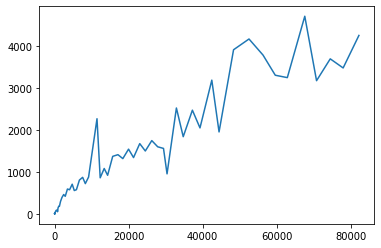

In [28]:
plt.plot(dt['confirmed'],dt['Infected'])

In [29]:
m

array([0.13094667])

In [30]:
1.0+m*14+m**2*24

array([3.24478211])